In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

#load bitcoin dataset

In [351]:
df=pd.read_csv('/content/BTC_DATA.csv')
df.head()

,Unnamed: 0,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,0,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2612.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,1,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4047.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
3,3,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0
4,4,2010/07/22,0.0649,221,491.903,412,181.543,1.705481e+09,334641.0,2570.0,...,49.814,0.0,0.0,0.0,0.0,-24.455,0.0,0.0,0.0,0.0


In [352]:
df['Date'] = pd.to_datetime(df['Date'])

In [353]:
#drop unnameed column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [354]:
df

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010-07-18,0.0726,248,765.285,424,1.815430e+02,1.554461e+09,401834.0000,2.612000e+03,0.000243,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,2010-07-19,0.0859,354,756.040,553,1.815430e+02,1.551287e+09,481473.0000,4.047000e+03,0.000022,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,2010-07-20,0.0783,413,984.707,632,1.815430e+02,1.640430e+09,431831.0000,2.341000e+03,0.000000,...,82.751,0.000,0.000,0.000,0.000,58.099,0.000,0.000,0.000,0.000
3,2010-07-21,0.0767,256,542.483,440,1.815430e+02,1.723493e+09,460783.0000,2.122000e+03,0.000000,...,78.603,0.000,0.000,0.000,0.000,5.652,0.000,0.000,0.000,0.000
4,2010-07-22,0.0649,221,491.903,412,1.815430e+02,1.705481e+09,334641.0000,2.570000e+03,0.000000,...,49.814,0.000,0.000,0.000,0.000,-24.455,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4384,2022-07-19,22514.0000,279812,746068.000,502989,2.915280e+13,1.891411e+20,0.1060,5.415818e+10,2.147000,...,93.897,75.464,58.546,44.905,42.126,7.894,13.943,12.592,16.868,-45.701
4385,2022-07-20,23568.0000,260069,717017.000,457913,2.915280e+13,1.924968e+20,0.0996,4.309965e+10,2.324000,...,96.938,81.982,64.268,48.147,43.052,11.050,20.222,16.851,16.143,-43.491
4386,2022-07-21,22936.0000,273837,719470.000,465780,2.882714e+13,1.910321e+20,0.1070,5.569455e+10,2.026000,...,66.958,69.145,59.013,46.453,42.639,5.182,13.698,10.446,9.218,-42.873
4387,2022-07-22,23145.0000,263144,661528.000,414074,2.769257e+13,1.889912e+20,0.1040,5.839661e+10,1.913000,...,71.358,70.905,60.175,47.091,42.823,2.806,11.375,6.403,13.958,-41.676


In [355]:
df['Date']

,Date
0,2010-07-18
1,2010-07-19
2,2010-07-20
3,2010-07-21
4,2010-07-22
...,...
4384,2022-07-19
4385,2022-07-20
4386,2022-07-21
4387,2022-07-22


In [356]:
# Create a new DataFrame with just the 'date' column
date_df = df[['Date']].copy()

# Display the new DataFrame
print(date_df.head())

        Date
0 2010-07-18
1 2010-07-19
2 2010-07-20
3 2010-07-21
4 2010-07-22


In [357]:
df.set_index('Date', inplace = True)

In [358]:
df.head()

,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2612.0,0.000243,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2010-07-19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4047.0,0.000022,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2010-07-20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
2010-07-21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0
2010-07-22,0.0649,221,491.903,412,181.543,1.705481e+09,334641.0,2570.0,0.000000,0.0,...,49.814,0.0,0.0,0.0,0.0,-24.455,0.0,0.0,0.0,0.0


#Handle missing values

In [359]:
#check the null values
df.isnull().sum()

,0
priceUSD,0
transactions,0
size,0
sentbyaddress,0
difficulty,0
...,...
price3rocUSD,0
price7rocUSD,0
price14rocUSD,0
price30rocUSD,0


In [360]:
#print column missing values >0
for i in df.columns:
  if df[i].isnull().sum()>0:
    print(i)
  else:
    pass

In [361]:
#check the duplicated rows
df.duplicated().sum()

0

In [362]:
df.shape

(4389, 736)

In [363]:
#check ths categorical dataset
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

##Feature Selection:-

#1.Duplicated column remove

In [364]:
#.Remove Duplicated columns in dataset:-
#check duplicated columns
df.T.duplicated()

,0
priceUSD,False
transactions,False
size,False
sentbyaddress,False
difficulty,False
...,...
price3rocUSD,False
price7rocUSD,False
price14rocUSD,False
price30rocUSD,False


In [365]:
#duplicated columns
df.columns[df.T.duplicated()]

Index([], dtype='object')

#2.apply Variance threshold

In [366]:
#Apply VarianceThreshold:
from sklearn.feature_selection import VarianceThreshold
model=VarianceThreshold(threshold=1)
var_th=model.fit(df)

In [367]:
#columns fromvar_th
columns=df.columns[var_th.get_support()]
columns

Index(['priceUSD', 'transactions', 'size', 'sentbyaddress', 'difficulty',
       'hashrate', 'mining_profitability', 'sentinusdUSD',
       'transactionfeesUSD', 'median_transaction_feeUSD',
       ...
       'price3rsiUSD', 'price7rsiUSD', 'price14rsiUSD', 'price30rsiUSD',
       'price90rsiUSD', 'price3rocUSD', 'price7rocUSD', 'price14rocUSD',
       'price30rocUSD', 'price90rocUSD'],
      dtype='object', length=689)

In [368]:
df_vt=var_th.transform(df)

In [369]:
#convert array dataset to   dataframe
df=pd.DataFrame(df_vt,columns=columns)

In [370]:
df.head()

,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,0.0726,248.0,765.285,424.0,181.543,1.554461e+09,401834.0,2612.0,0.000243,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,0.0859,354.0,756.040,553.0,181.543,1.551287e+09,481473.0,4047.0,0.000022,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,0.0783,413.0,984.707,632.0,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
3,0.0767,256.0,542.483,440.0,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0
4,0.0649,221.0,491.903,412.0,181.543,1.705481e+09,334641.0,2570.0,0.000000,0.0,...,49.814,0.0,0.0,0.0,0.0,-24.455,0.0,0.0,0.0,0.0


#3.Correlation feature selection

In [371]:
#3.Correlation feature selection
# Calculate correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than a threshold (e.g., 0.9)
to_drop_col = [column for column in upper.columns if any(upper[column] > 0.9)]

# Print the columns to be dropped
print("Columns to be dropped:")
print(to_drop_col)

Columns to be dropped:
['size', 'sentbyaddress', 'hashrate', 'median_transaction_feeUSD', 'activeaddresses', 'transactions3sma', 'transactions7sma', 'transactions14sma', 'transactions30sma', 'transactions90sma', 'transactions3ema', 'transactions7ema', 'transactions14ema', 'transactions30ema', 'transactions90ema', 'transactions3wma', 'transactions7wma', 'transactions14wma', 'transactions30wma', 'transactions90wma', 'transactions14std', 'transactions30std', 'transactions3var', 'transactions7var', 'transactions14var', 'transactions30var', 'transactions90var', 'transactions7rsi', 'transactions14rsi', 'transactions30rsi', 'transactions90rsi', 'size3sma', 'size7sma', 'size14sma', 'size30sma', 'size90sma', 'size3ema', 'size7ema', 'size14ema', 'size30ema', 'size90ema', 'size3wma', 'size7wma', 'size14wma', 'size30wma', 'size90wma', 'size14std', 'size30std', 'size3var', 'size7var', 'size14var', 'size30var', 'size90var', 'size7rsi', 'size14rsi', 'size30rsi', 'size90rsi', 'size3roc', 'size7roc', '

In [372]:
df=df.drop(columns=to_drop_col)

In [373]:
df.shape

(4389, 305)

In [374]:
df

,priceUSD,transactions,difficulty,mining_profitability,sentinusdUSD,transactionfeesUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,top100cap,...,price3stdUSD,price7stdUSD,price14stdUSD,price30stdUSD,price3varUSD,price3rsiUSD,price7rsiUSD,price90rsiUSD,price3rocUSD,price90rocUSD
0,0.0726,248.0,1.815430e+02,401834.0000,2.612000e+03,0.000243,8.372,6.237,0.363,25.782,...,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
1,0.0859,354.0,1.815430e+02,481473.0000,4.047000e+03,0.000022,8.276,7.666,0.429,25.685,...,0.030,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
2,0.0783,413.0,1.815430e+02,431831.0000,2.341000e+03,0.000000,7.956,3.940,5.105,25.602,...,0.011,0.0,0.0,0.0,0.0,82.751,0.000,0.000,58.099,0.000
3,0.0767,256.0,1.815430e+02,460783.0000,2.122000e+03,0.000000,6.957,4.583,3.837,25.638,...,0.008,0.0,0.0,0.0,0.0,78.603,0.000,0.000,5.652,0.000
4,0.0649,221.0,1.815430e+02,334641.0000,2.570000e+03,0.000000,8.182,6.474,1.054,25.604,...,0.012,0.0,0.0,0.0,0.0,49.814,0.000,0.000,-24.455,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4384,22514.0000,279812.0,2.915280e+13,0.1060,5.415818e+10,2.147000,10.435,267583.000,544.364,15.520,...,1056.000,1803.0,1611.0,1660.0,278607.0,93.897,75.464,42.126,7.894,-45.701
4385,23568.0000,260069.0,2.915280e+13,0.0996,4.309965e+10,2.324000,11.429,233186.000,592.904,15.476,...,1447.000,2155.0,2058.0,1974.0,523759.0,96.938,81.982,43.052,11.050,-43.491
4386,22936.0000,273837.0,2.882714e+13,0.1070,5.569455e+10,2.026000,10.360,314853.000,498.489,15.641,...,866.295,2000.0,2240.0,2132.0,187617.0,66.958,69.145,42.639,5.182,-42.873
4387,23145.0000,263144.0,2.769257e+13,0.1040,5.839661e+10,1.913000,10.909,284696.000,519.832,15.624,...,525.270,1887.0,2427.0,2293.0,68977.0,71.358,70.905,42.823,2.806,-41.676


In [375]:
#spli data as per target column
X=df.drop('priceUSD',axis=1)
y=df['priceUSD']

#4.apply anova test

In [376]:
#aaply anova test
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
model=SelectKBest(score_func=f_classif,k=150)
df_av=model.fit(X,y)

In [377]:
df_av.get_support()

array([ True,  True, False,  True,  True, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False,  True,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False,  True,  True,  True,
        True,  True,

In [378]:
columns=X.columns[df_av.get_support()]
columns

Index(['transactions', 'difficulty', 'sentinusdUSD', 'transactionfeesUSD',
       'transactionvalueUSD', 'mediantransactionvalueUSD', 'top100cap',
       'fee_to_rewardUSD', 'transactions3std', 'transactions7std',
       ...
       'price3stdUSD', 'price7stdUSD', 'price14stdUSD', 'price30stdUSD',
       'price3varUSD', 'price3rsiUSD', 'price7rsiUSD', 'price90rsiUSD',
       'price3rocUSD', 'price90rocUSD'],
      dtype='object', length=150)

In [379]:
#transfom the data in variance theshold which is array format
df_av=df_av.transform(X)

In [380]:
X=pd.DataFrame(df_av,columns=columns)

In [381]:
X.shape

(4389, 150)

In [382]:
y.shape

(4389,)

#5.Recursive Feature Elimination

In [383]:
# Recursive Feature Elimination
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import RFE
model =Ridge()
rfe = RFE(model, n_features_to_select=100)
X_rfe = rfe.fit(X, y)

In [384]:
X_rfe.get_support()

array([ True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [385]:
columns=X.columns[X_rfe.get_support()]
columns

Index(['transactions', 'transactionfeesUSD', 'transactionvalueUSD',
       'mediantransactionvalueUSD', 'top100cap', 'fee_to_rewardUSD',
       'transactions3std', 'transactions7std', 'transactions90std',
       'size90std', 'sentbyaddress7mom', 'sentbyaddress3std',
       'sentbyaddress90rsi', 'difficulty7trx', 'difficulty14trx',
       'difficulty90rsi', 'difficulty7roc', 'difficulty14roc', 'hashrate7trx',
       'hashrate14roc', 'mining_profitability90sma',
       'mining_profitability7trx', 'mining_profitability90rsi',
       'mining_profitability90roc', 'sentinusd14trxUSD', 'sentinusd30trxUSD',
       'sentinusd14rocUSD', 'transactionfees90smaUSD',
       'transactionfees30trxUSD', 'transactionfees3momUSD',
       'transactionfees7momUSD', 'transactionfees14momUSD',
       'transactionfees30momUSD', 'transactionfees90momUSD',
       'transactionfees3stdUSD', 'transactionfees7stdUSD',
       'transactionfees3varUSD', 'transactionfees7varUSD',
       'transactionfees14varUSD', 'medi

In [386]:
#transform data
X_rfe=X_rfe.transform(X)

In [387]:
X=pd.DataFrame(X_rfe,columns=columns)

In [388]:
X.shape

(4389, 100)

#6.apply forward feature selection method

In [389]:
#apply forward selection feature
# Initialize the model (Ridge or another regressor)
from sklearn.feature_selection import SequentialFeatureSelector
model = Ridge()

# Initialize the forward selector
forward_selector = SequentialFeatureSelector(model, n_features_to_select=50,direction='forward',scoring='r2',cv=5)

# Fit the selector to the data
X_fit=forward_selector.fit(X, y)

# Get the selected features
columns= X.columns[forward_selector.get_support()]
columns

Selected Features:
Index(['fee_to_rewardUSD', 'size90std', 'sentbyaddress7mom',
       'transactionfees3momUSD', 'transactionfees7momUSD',
       'transactionfees14momUSD', 'transactionfees30momUSD',
       'transactionfees90momUSD', 'transactionfees3varUSD',
       'transactionfees7varUSD', 'transactionfees14varUSD',
       'median_transaction_fee3rsiUSD', 'median_transaction_fee7rsiUSD',
       'median_transaction_fee3rocUSD', 'transactionvalue3momUSD',
       'transactionvalue7momUSD', 'transactionvalue14momUSD',
       'transactionvalue30momUSD', 'transactionvalue90momUSD',
       'transactionvalue7stdUSD', 'transactionvalue14stdUSD',
       'mediantransactionvalue3momUSD', 'mediantransactionvalue7momUSD',
       'mediantransactionvalue14momUSD', 'mediantransactionvalue30momUSD',
       'mediantransactionvalue90momUSD', 'mediantransactionvalue3stdUSD',
       'activeaddresses3trx', 'activeaddresses30std', 'activeaddresses90std',
       'top100cap3trx', 'top100cap7mom', 'top100cap14

In [390]:
#transform data
X_rfe=X_fit.transform(X)

In [408]:
X=pd.DataFrame(X_rfe,columns=columns)

In [409]:
X.shape

(4389, 50)

In [411]:
#concat the X,y
df=pd.concat([X,y],axis=1)

In [415]:
#concat date df
df=pd.concat([date_df,df],axis=1)

In [417]:
#set index the date
df.set_index('Date',inplace=True)

In [418]:
df.head()

,fee_to_rewardUSD,size90std,sentbyaddress7mom,transactionfees3momUSD,transactionfees7momUSD,transactionfees14momUSD,transactionfees30momUSD,transactionfees90momUSD,transactionfees3varUSD,transactionfees7varUSD,...,fee_to_reward7stdUSD,fee_to_reward14stdUSD,fee_to_reward30stdUSD,fee_to_reward3varUSD,price14trxUSD,price30stdUSD,price3rsiUSD,price90rsiUSD,price3rocUSD,priceUSD
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-18,0.01630,742.381,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0726
2010-07-19,0.00154,746.478,-2017.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0859
2010-07-20,0.00000,756.599,-793.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,82.751,0.0,58.099,0.0783
2010-07-21,0.00000,756.295,-5640.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,78.603,0.0,5.652,0.0767
2010-07-22,0.00000,755.827,-797.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,49.814,0.0,-24.455,0.0649


#spliting dataset train,test

In [419]:
# Splitting the data into 80% training and 20% testing
train_size=int(len(df)*0.8)
train,test=df[:train_size],df[train_size:]

In [426]:
train.shape

(3511, 51)

In [427]:
test.shape

(878, 51)

In [431]:
# Extract the target variable (priceUSD)
y_train = train['priceUSD']
y_test = test['priceUSD']

#Apply ARIMA Models

In [432]:
# Fit the ARIMA model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Fit the ARIMA model
arima_model = ARIMA(y_train, order=(5, 1, 0))  # Adjust (p, d, q) as needed
arima_fit = arima_model.fit()

# Forecast the future values
arima_forecast = arima_fit.forecast(steps=len(y_test))


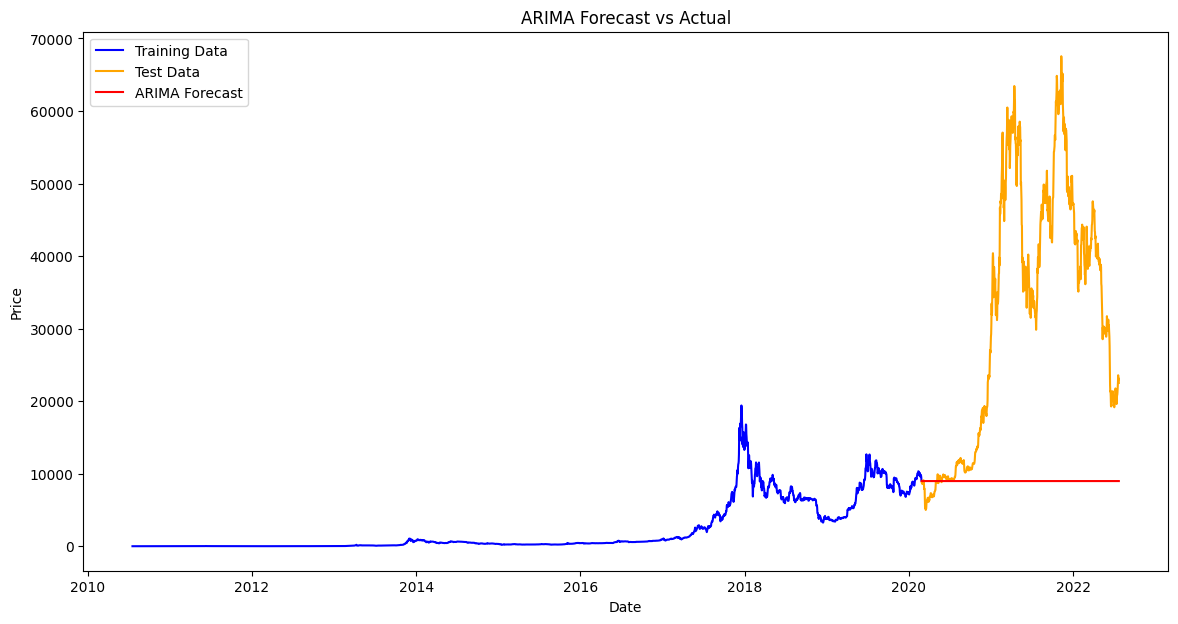

In [434]:
# Plot ARIMA forecast
plt.figure(figsize=(14, 7))
plt.plot(y_train.index, y_train, label='Training Data', color='blue')
plt.plot(y_test.index, y_test, label='Test Data', color='orange')
plt.plot(y_test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()

#Apply Sarima

In [435]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Fit the SARIMA model
sarima_model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust orders as needed
sarima_fit = sarima_model.fit(disp=False)

# Forecast the future values
sarima_forecast = sarima_fit.forecast(steps=len(y_test))


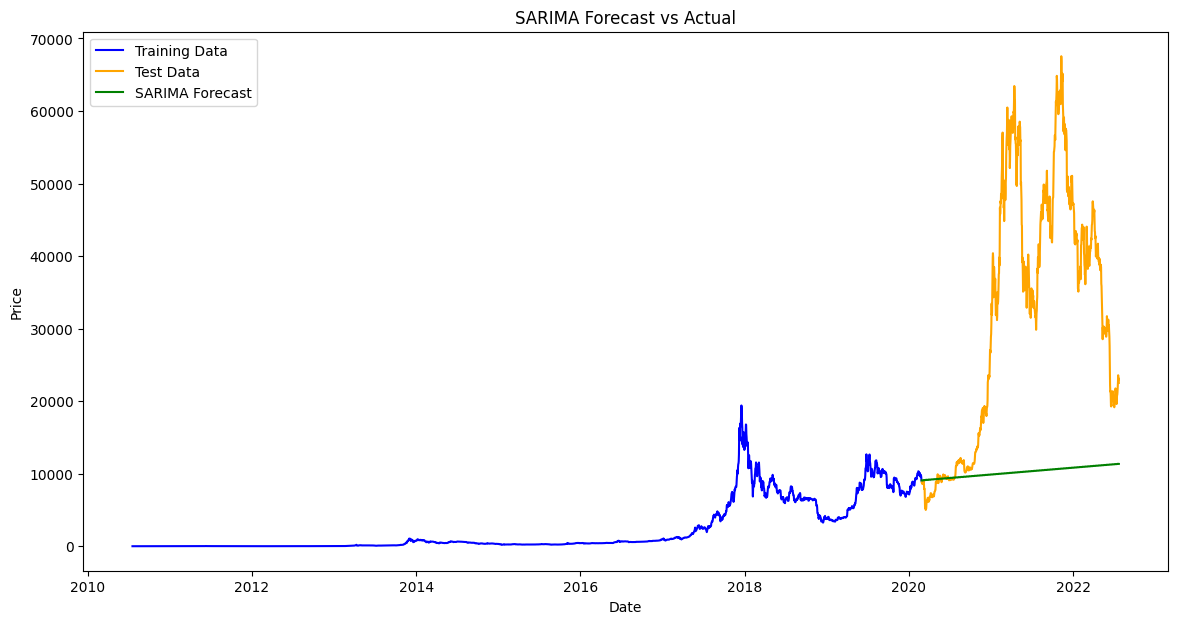

In [436]:
# Plot SARIMA forecast
plt.figure(figsize=(14, 7))
plt.plot(y_train.index, y_train, label='Training Data', color='blue')
plt.plot(y_test.index, y_test, label='Test Data', color='orange')
plt.plot(y_test.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SARIMA Forecast vs Actual')
plt.legend()
plt.show()

#apply Exponential Smoothing (ETS) model

In [437]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [438]:
# Fit the Exponential Smoothing model
ets_model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12)  # Adjust parameters as needed
ets_fit = ets_model.fit()

# Forecast the future values
ets_forecast = ets_fit.forecast(steps=len(y_test))


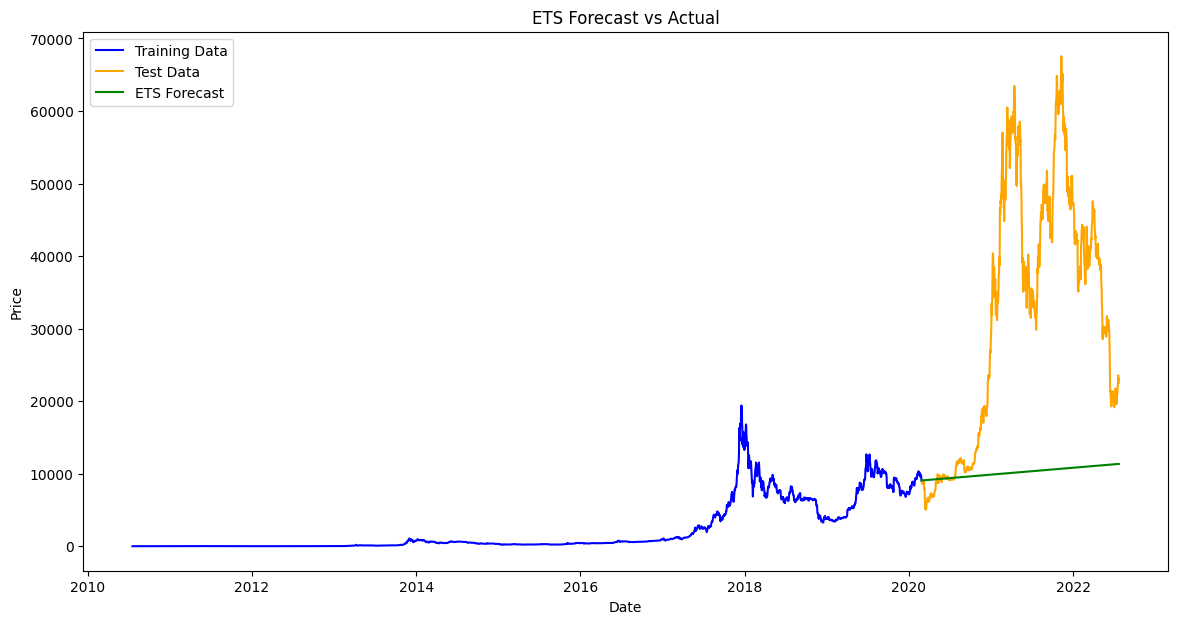

In [439]:
# Plot ETS forecast
plt.figure(figsize=(14, 7))
plt.plot(y_train.index, y_train, label='Training Data', color='blue')
plt.plot(y_test.index, y_test, label='Test Data', color='orange')
plt.plot(y_test.index, ets_forecast, label='ETS Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ETS Forecast vs Actual')
plt.legend()
plt.show()


#SimpleExpSmoothing

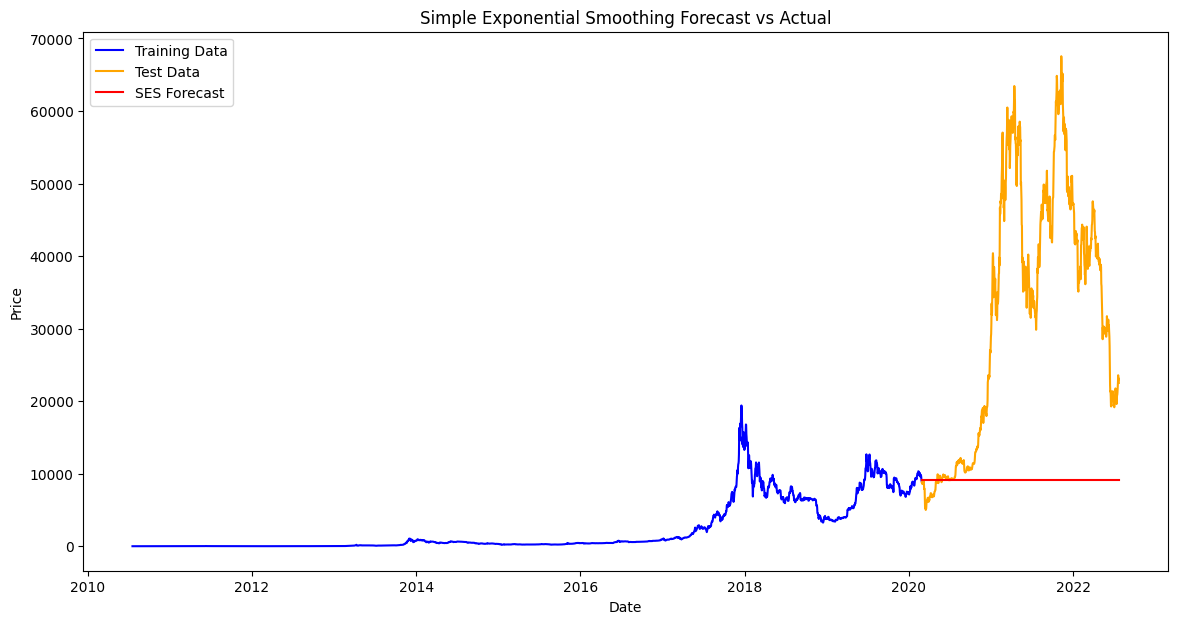

In [440]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit Simple Exponential Smoothing model
ses_model = SimpleExpSmoothing(y_train).fit()

# Forecast the future values
ses_forecast = ses_model.forecast(steps=len(y_test))

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_train.index, y_train, label='Training Data', color='blue')
plt.plot(y_test.index, y_test, label='Test Data', color='orange')
plt.plot(y_test.index, ses_forecast, label='SES Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Simple Exponential Smoothing Forecast vs Actual')
plt.legend()
plt.show()


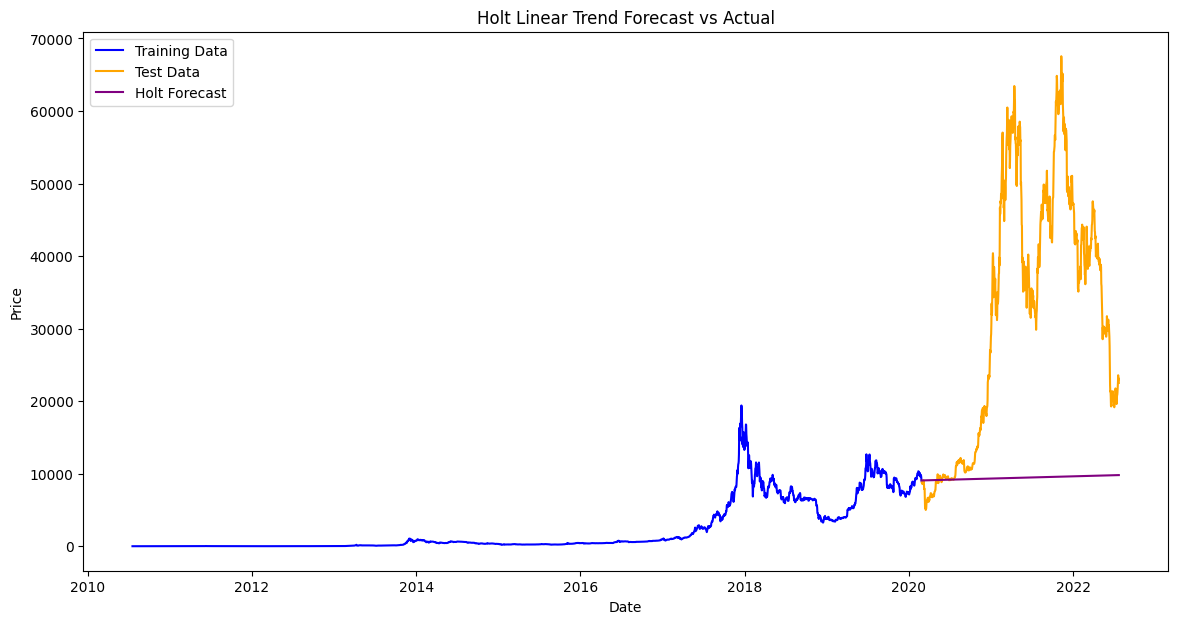

In [443]:
from statsmodels.tsa.holtwinters import Holt

# Fit Holt's Linear Trend model
holt_model = Holt(y_train).fit()

# Forecast the future values
holt_forecast = holt_model.forecast(steps=len(y_test))

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_train.index, y_train, label='Training Data', color='blue')
plt.plot(y_test.index, y_test, label='Test Data', color='orange')
plt.plot(y_test.index, holt_forecast, label='Holt Forecast', color='purple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt Linear Trend Forecast vs Actual')
plt.legend()
plt.show()
